In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
EPOCHES=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

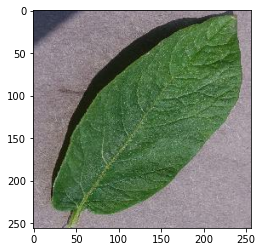

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [6]:
train_Size=0.8
len(dataset)*train_Size

54.400000000000006

In [7]:
train_data=dataset.take(54)

In [8]:
len(train_data)

54

In [9]:
test_data=dataset.skip(54)
len(test_data)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_data=test_data.take(6)

In [12]:
len(val_data)

6

In [13]:
test_data=test_data.skip(6)
len(test_data)

8

In [14]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [15]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
n_classes=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(IMAGE_SIZE,IMAGE_SIZE),),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
    
])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [19]:
model.compile(
   optimizer='adam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
   metrics=["accuracy"]
    
)

In [20]:
history = model.fit(
    train_data,
    epochs=EPOCHES,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_data
)

Epoch 1/50
54/54 [==============================] - 128s 2s/step - loss: 0.8492 - accuracy: 0.5266 - val_loss: 0.5998 - val_accuracy: 0.7760
Epoch 2/50
54/54 [==============================] - 106s 2s/step - loss: 0.5875 - accuracy: 0.7436 - val_loss: 0.4671 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 104s 2s/step - loss: 0.4568 - accuracy: 0.7975 - val_loss: 0.3786 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 104s 2s/step - loss: 0.3324 - accuracy: 0.8571 - val_loss: 0.3355 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 104s 2s/step - loss: 0.2882 - accuracy: 0.8860 - val_loss: 0.2472 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 104s 2s/step - loss: 0.2209 - accuracy: 0.9155 - val_loss: 0.4804 - val_accuracy: 0.8594
Epoch 7/50
54/54 [==============================] - 105s 2s/step - loss: 0.2317 - accuracy: 0.9039 - val_loss: 0.2294 - val_accuracy: 0.9062
Epoch 8/50
54

In [21]:
scores=model.evaluate(test_data)

8/8 [==============================] - 10s 308ms/step - loss: 0.0604 - accuracy: 0.9828


In [59]:
history.history.keys

<function dict.keys>

Text(0.5, 1.0, 'total Accuracy')

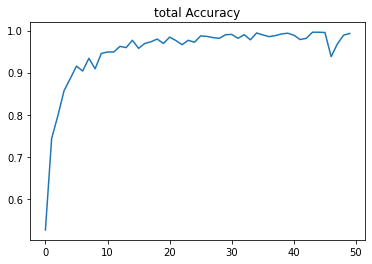

In [61]:
plt.plot(history.history['accuracy'])
plt.title('total Accuracy')


Text(0.5, 1.0, 'loss')

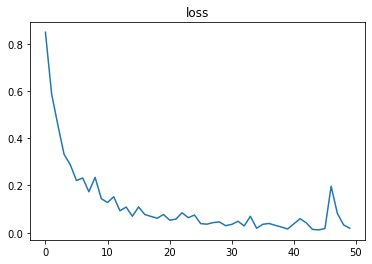

In [62]:
plt.plot(history.history['loss'])
plt.title('loss')

In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [64]:
batch_size = 100
target_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # data labels
Y_pred = model.predict_generator(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

C:\Users\NADA\AppData\Local\Temp\ipykernel_19332\1121647713.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_data)


[2 1 1 0 1 1 0 0 0 0 2 0 0 1 1 1 1 1 1 0 0 0 1 0 2 1 1 2 1 2 0 1 0 1 0 0 0
 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 0 2 0 1 1 0 0 0 2 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0
 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 1 1 1 1 1 1 1 2 1 0 1 1 0 2 1 0 1 1 1 1 1
 0 0 1 2 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 2 0 1 0 0 1 0 2 1 0 1 0 0 2 2 1 1
 1 0 1 1 1 1 1 0 0 0]


In [69]:
cm = confusion_matrix(test_data.classes, Y_pred)

AttributeError: 'PrefetchDataset' object has no attribute 'classes'

In [70]:


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [68]:
cm = confusion_matrix(test_data.classes, Y_pred)

AttributeError: 'PrefetchDataset' object has no attribute 'classes'

In [31]:
target_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
plot_confusion_matrix(cm=cm, classes=target_names, title = 'Confusion Matrix')

NameError: name 'cm' is not defined